In [1]:
import pandas as pd
import evaluate
import matplotlib.pyplot as plt
import streamlit as st

In [2]:
# Load the dataset (use the first 1000 rows for the analysis)
df = pd.read_csv("Generated_Summaries.csv")  # Replace with your actual dataset path
df = df.head(1000)  # Limit to the first 1000 rows

In [5]:
# Load ROUGE metric
rouge = evaluate.load("rouge")

# Compute ROUGE-1 F1 scores row by row
rouge1_scores = []
for p, r in zip(df['text'], df['article_summaries']):
    result = rouge.compute(predictions=[str(p)], references=[str(r)])
    rouge1_scores.append(result['rouge1'])  # this returns a float directly

# Add scores to DataFrame
df['rouge1'] = rouge1_scores

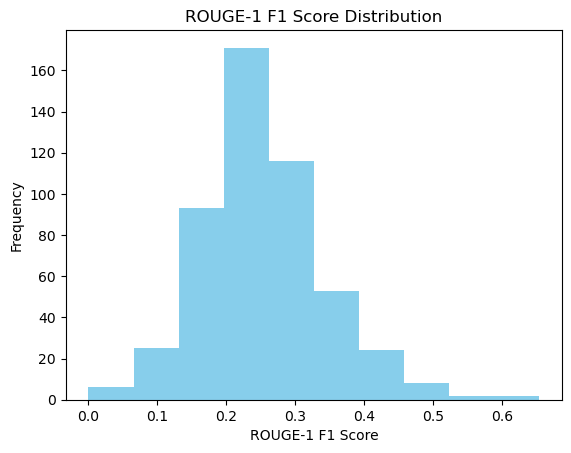

In [6]:
# Plot the ROUGE-1 F1 score distribution
plt.hist(df['rouge1'], bins=10, color='skyblue')
plt.title("ROUGE-1 F1 Score Distribution")
plt.xlabel("ROUGE-1 F1 Score")
plt.ylabel("Frequency")
plt.show()